### k-means clustering

In [346]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [347]:
import scipy as sc
import scipy.stats as stats
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd

In [348]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [349]:
rv0 = stats.multivariate_normal(mean=[3, 3], cov=[[.3, .3],[.3,.4]])
rv1 = stats.multivariate_normal(mean=[1.5, 1], cov=[[.5, -.5],[-.5,.7]])
rv2 = stats.multivariate_normal(mean=[0, 1.2], cov=[[.15, .1],[.1,.3]])
rv3 = stats.multivariate_normal(mean=[3.2, 1], cov=[[.2, 0],[0,.1]])

z0 = rv0.rvs(size=300)
z1 = rv1.rvs(size=300)
z2 = rv2.rvs(size=300)
z3 = rv3.rvs(size=300)

z=np.concatenate((z0, z1, z2, z3), axis=0)

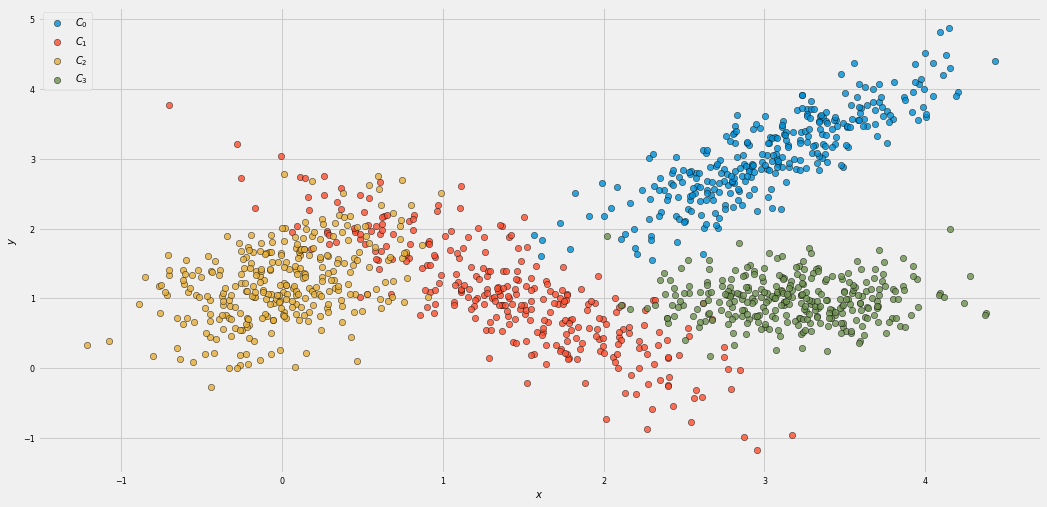

In [350]:
fig, ax = plt.subplots()
ax.scatter(z0[:,0], z0[:,1], s=40, color='C0', alpha =.8, edgecolors='k', label=r'$C_0$')
ax.scatter(z1[:,0], z1[:,1], s=40, color='C1', alpha =.8, edgecolors='k', label=r'$C_1$')
ax.scatter(z2[:,0], z2[:,1], s=40, color='C2', alpha =.8, edgecolors='k', label=r'$C_2$')
ax.scatter(z3[:,0], z3[:,1], s=40, color='C3', alpha =.8, edgecolors='k', label=r'$C_3$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

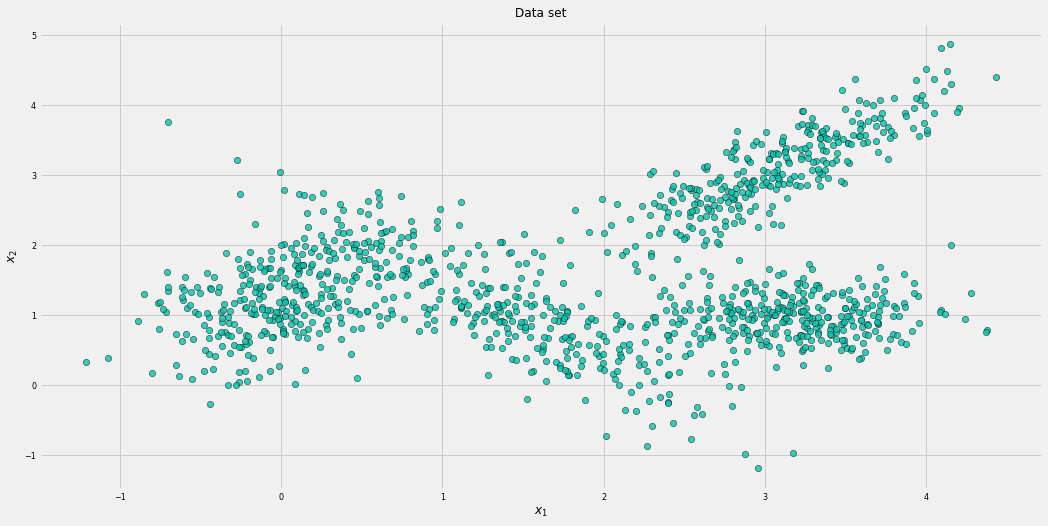

In [351]:
cc='xkcd:turquoise'
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.scatter(z[:,0], z[:,1], s=40, color=cc, edgecolors='k', alpha=.8)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [375]:
# Number of clusters
nc = 3
# X coordinates of random centroids
C_x = np.random.sample(nc)*(np.max(z[:,0])-np.min(z[:,0]))*.7+np.min(z[:,0])*.7
# Y coordinates of random centroids
C_y = np.random.sample(nc)*(np.max(z[:,1])-np.min(z[:,1]))*.7+np.min(z[:,0])*.7
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

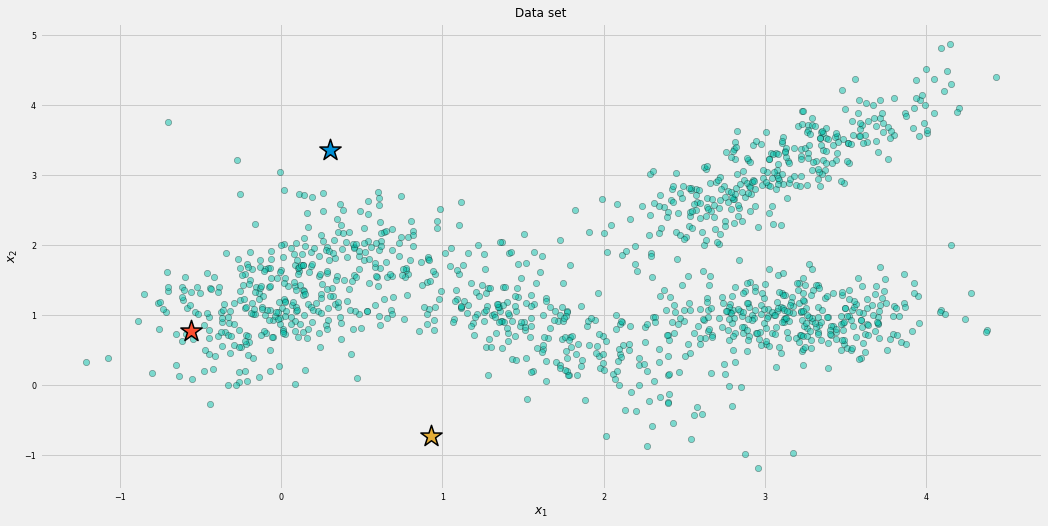

In [376]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.scatter(z[:,0], z[:,1], s=40, color=cc, edgecolors='k', alpha=.5)
for i in range(nc):
    plt.scatter(C_x[i], C_y[i], marker='*', s=500, c=colors[i], edgecolors='k', linewidth=1.5)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [377]:
C_list = []
errors = []
# Cluster Labels(0, 1, 2, 3)
clusters = np.zeros(z.shape[0])
C_list.append(C)
# Error func. - Distance between new centroids and old centroids
error = np.linalg.norm([euclidean(C[i,:], [0,0]) for i in range(nc)])
errors.append(error)
print("Error: {0:3.5f}".format(error))

Error: 3.69438


In [378]:
for l in range(10):
    # Assigning each value to its closest cluster
    for i in range(z.shape[0]):
        distances = [euclidean(z[i,:], C[j,:]) for j in range(nc)]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C = np.zeros([nc,2])
    # Finding the new centroids by taking the average value
    for i in range(nc):
        points = [z[j,:] for j in range(z.shape[0]) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = np.linalg.norm([euclidean(C[i,:], C_list[-1][i,:]) for i in range(nc)])
    errors.append(error)
    C_list.append(C)

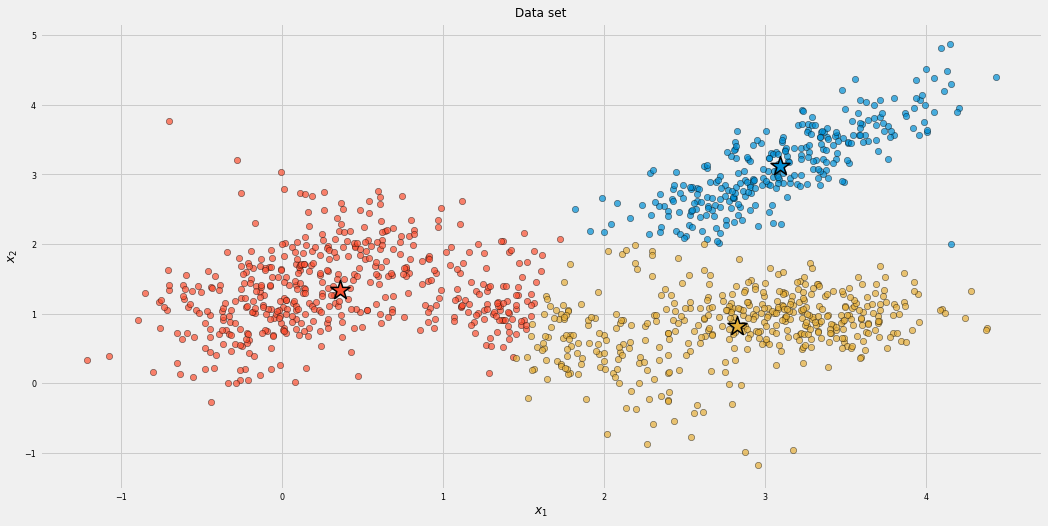

In [379]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
for cl in range(nc):
    z1 = z[clusters==cl]
    plt.scatter(z1[:,0],z1[:,1], c=colors[cl], marker='o', s=40, edgecolors='k', alpha=.7)

for i in range(nc):
    plt.scatter(C[i,0], C[i,1], marker='*', s=400, c=colors[i], edgecolors='k', linewidth=1.5)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [335]:
C_list

[array([[-0.25685284,  0.12237214],
        [ 0.15388155, -0.48152733],
        [ 0.5958517 ,  2.092374  ]], dtype=float32),
 array([[-0.16035572,  0.85817262],
        [ 2.19620847,  0.06113716],
        [ 2.27415301,  1.85695501]]),
 array([[0.08391695, 1.33105865],
        [2.49748177, 0.51964758],
        [2.84422762, 2.2336536 ]]),
 array([[0.25200621, 1.37786314],
        [2.65515927, 0.73705948],
        [3.12786733, 2.75032772]]),
 array([[0.30412073, 1.36560998],
        [2.78601384, 0.84680071],
        [3.14336569, 3.07792434]]),
 array([[0.34122446, 1.3496879 ],
        [2.84168161, 0.88376697],
        [3.14760065, 3.16033657]])]

In [336]:
print("Error: {0:3.5f}".format(error))

Error: 0.11360


In [337]:
errors

[2.2515694541627873,
 2.8086323050631976,
 1.0252680735617625,
 0.6708043145270117,
 0.37361994376900687,
 0.11360156251496974]